<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 02:  Regression**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
3. [Ejercicio 3.](#eje3)

In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "ML-20221-Laconga" #@param {type:"string"}
assignment_id = group_id +'.taller_regression'
student_id = "2022146" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
 #@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **Imports**

import scipy.stats as stats
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<br><br><br>

### **Dataset de nacidos vivos en Santander**

Los siguientes ejercicios utilizarán un dataset **basado** en el conjunto de datos abiertos [Nacidos Vivos en Municipio de Bucaramanga enero 2016 a agosto 2021](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Nacidos-Vivos-en-Municipio-de-Bucaramanga-enero-20/x5xp-9w4b). En este dataset se han caracterizado un conjunto de atributos relacionados con los nacimientos en el departamento de Santander, tales como `PESO`, `TALLA`, `TIEMPOGESTACION` entre otros.

(199, 20)


,SEXO,PESO,TALLA,TIEMPOGESTACION,NUMEROCONSULTASPRENATALES,TIPOPARTO,EDADMADRE,NIVELEDUCATIVOMADRE,ULTIMOANOAPROBADOMADRE,MUNICIPIORESIDENCIA,AREARESIDENCIA,NUMEROHIJOSNACIDOSVIVOS,NUMEROEMBARAZOS,REGIMENSEGURIDAD,TIPOADMINISTRADORA,EDADPADRE,NIVELEDUCATIVOPADRE,ULTIMOANOAPROBADOPADRE,CURSODEVIDAMADRE,CURSODEVIDAPADRE
0,1,3670,53,40,6,1,20,2,11,0,0,1,1,2,2,36,2,11,1,2
1,1,2635,50,35,8,2,29,2,11,0,0,1,1,0,0,24,2,11,2,1
2,0,2860,51,36,5,2,39,6,5,0,0,5,7,2,2,45,6,5,2,2


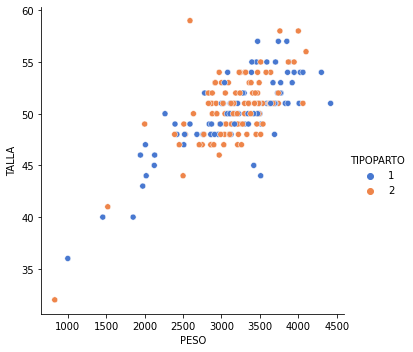

In [ ]:
#@title **Dataset de nacidos vivos en Santander**
variable_x = "PESO" #@param {type:"string"}
variable_y = "TALLA" #@param {type:"string"}
variable_z = "TIPOPARTO" #@param {type:"string"}

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_h = pd.read_csv("https://gitlab.com/gustavogarzonv/sets/-/raw/main/nacidos.csv")
print(data_h.shape)

sns.relplot(x=variable_x, y=variable_y, hue=variable_z, palette="muted", data=data_h);

data_h.head(3)

<br><br><br>

---
# **Ejercicio 1**  <a name="eje1"></a>
---

En este ejercicio se realizará una regresión que tenga como objetivo predecir el peso (`PESO`) de los neonatos siguiendo las siguientes indicaciones:

- Vamos a utilizar como características únicamente a las columnas `TALLA`, `TIEMPOGESTACION` y `NUMEROCONSULTASPRENATALES`
- Utilice un 70% del dataset para entrenar y un 30% para test. Emplee la función `train_test_split` **desactivando** la opción `shuffle`
- Debe entrenar un estimador `RandomForestRegressor` con parámetros `max_depth`=20 , `n_estimators`=50 y `random_state`=21

- Devuelva el estimador

- Devuelva **una lista** con los valores de `MSE`, `RMSE` y `MAE` para la partición de test


In [ ]:
#@title **code student**
def function_t05_01(data_h):
    #libraries
    import numpy as np
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

    """Put your code here"""

    data = data_h.values[:,[2,3,4]]
    data_y = data_h.values[:,1]
    X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.3, shuffle=False)
    est = RandomForestRegressor(max_depth=20 , n_estimators=50, random_state=21)
    est.fit(X_train, y_train)
    X_pred=est.predict(X_test)
    mse = mean_squared_error(y_test, X_pred)
    rmse = np.sqrt(mean_squared_error(y_test, X_pred))
    mae = mean_absolute_error(y_test, X_pred)
    lista = mse, rmse, mae

    return est, lista

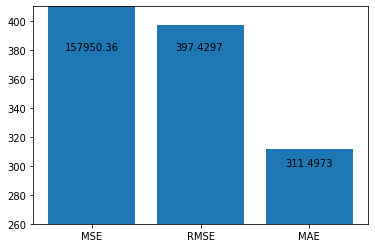

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


In [ ]:
#@title **send your answer**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_h = pd.read_csv("https://gitlab.com/gustavogarzonv/sets/-/raw/main/nacidos.csv")
est, lista = function_t05_01(data_h)

plt.bar(range(0,len(lista)), lista)
plt.xticks(range(0,len(lista)), ('MSE', 'RMSE', 'MAE'))
plt.ylim((260,410))
plt.text(-0.25, 380, str(lista[0])[:9])
plt.text(0.77, 380, str(lista[1])[:8])
plt.text(1.78, 300, str(lista[2])[:8])
plt.show()

student_func_str = inspect.getsource(function_t05_01)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
# **Ejercicio 2**  <a name="eje2"></a>
---

a) En este ejercicio se realizará una regresión que tenga como objetivo predecir la talla (`TALLA`) de los neonatos siguiendo las siguientes indicaciones:

- Vamos a utilizar como características únicamente a las columnas `PESO`, `TIEMPOGESTACION` y `NUMEROCONSULTASPRENATALES`
- Utilice un 85% del dataset para entrenar y un 15% para test. Emplee la función `train_test_split` **desactivando** la opción `shuffle`

Debe entrenar un estimador `SVR` con las siguientes consideraciones:

- Realice una exploración para los valores de `kernel`: 'linear', 'poly', 'rbf'.

- Devuelva **una lista** `scores` con el valor del **mean squared error (MSE)** para cada uno de los kernels.

b) Posteriormente, también con el objetivo de predecir la talla (`TALLA`) de los neonatos, siga las siguientes indicaciones:

- Vamos a utilizar como única característica a la columna `PESO`.
- Utilice un 85% del dataset para entrenar y un 15% para test. Emplee la función `train_test_split` **desactivando** la opción `shuffle`

Debe entrenar un estimador `SVR` con las siguientes consideraciones:

- Realice una exploración para los valores de `kernel`: 'linear', 'poly', 'rbf'.

- Devuelva **una lista** `score2` con el valor del **mean squared error (MSE)** para cada uno de los kernels.

- Devuelva **una lista** `predictions` con las **predicciones** para cada uno de los kernels.

- Devuelva los datos de test `X_test`

- Devuelva las etiquetas `y_test`

In [ ]:
from numpy.lib.function_base import append
#@title **code student**
def function_t05_02(data_h):
    #libraries
    import numpy as np
    from sklearn.svm import SVR
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import make_scorer, mean_squared_error
    
    """Put your code here"""
    
    data = data_h.values[:,[1,3,4]]
    data_y = data_h.values[:,2]
    X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.15, random_state=21, shuffle=False)
    scores = []
    kernels = [ "linear", "poly", "rbf"]
    for i in kernels:
      est = SVR(kernel=str(i))
      est.fit(X_train, y_train)
      pred = est.predict(X_test)
      mse = mean_squared_error(y_test, pred)
      scores.append(mse)
    score2 = []
    predictions = []
    data = data_h.values[:,[1]]
    data_y = data_h.values[:,2]
    X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.15, random_state=21, shuffle=False)
    for i in kernels:
      est = SVR(kernel = i)
      est.fit(X_train, y_train)
      pred = est.predict(X_test)
      mse = mean_squared_error(y_test, pred)
      score2.append(mse)
      predictions.append(pred)

    
    return scores, score2, predictions, X_test, y_test

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


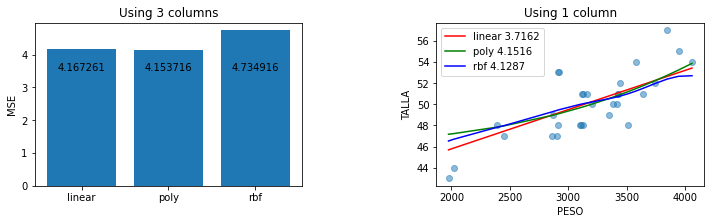

In [ ]:
#@title **send your answer**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_h = pd.read_csv("https://gitlab.com/gustavogarzonv/sets/-/raw/main/nacidos.csv")

scores, score2, predictions, x, y = function_t05_02(data_h)

y_ord = []
x_ord = np.sort(x,axis=0)
y_ord.append(predictions[0][np.argsort(x, axis=0)])
y_ord.append(predictions[1][np.argsort(x, axis=0)])
y_ord.append(predictions[2][np.argsort(x, axis=0)])
f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)
ax1 = f.add_subplot(121)
ax1.set_title('Using 3 columns')
ax1.bar(range(0,len(scores)), scores)
ax1.set_xticks(range(0,len(scores)))
ax1.set_xticklabels(('linear', 'poly', 'rbf'))
ax1.set_ylabel('MSE')
ax1.text(-0.28, 3.5, str(scores[0])[:8])
ax1.text(0.72, 3.5, str(scores[1])[:8])
ax1.text(1.72, 3.5, str(scores[2])[:8])
ax2 = f.add_subplot(122)
ax2.set_title('Using 1 column')
ax2.plot(x_ord,y_ord[0], c='red', linewidth=1.5, label='linear '+str(score2[0])[:6])
ax2.plot(x_ord,y_ord[1], c='green', linewidth=1.5, label='poly '+str(score2[1])[:6])
ax2.plot(x_ord,y_ord[2], c='blue', linewidth=1.5, label='rbf '+str(score2[2])[:6])
ax2.scatter(x,y,alpha=0.5)
ax2.set_xlabel('PESO')
ax2.set_ylabel('TALLA')
ax2.legend()

student_func_str = inspect.getsource(function_t05_02)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
# **Ejercicio 3**  <a name="eje3"></a>
---

a) En este ejercicio se realizará una regresión que tenga como objetivo predecir la talla (`TALLA`) de los neonatos siguiendo las siguientes indicaciones:

- Vamos a utilizar como características únicamente a las columnas `PESO` y `TIEMPOGESTACION`
- Utilice un 80% del dataset para entrenar y un 20% para test. Emplee la función `train_test_split` **desactivando** la opción `shuffle`

Debe entrenar los siguientes estimadores con las siguientes consideraciones:

- Entrene un estimador **`DecisionTreeRegressor`** con el parámetro `random_state`=21.

- Explore los siguientes valores del parámetro `max_depth`: `[2,10,50,100,500]`.

- Devuelva **una lista** `scores1` con el valor del **root mean squared error (RMSE)** para este estimador.

- Entrene un estimador **`RandomForestRegressor`** con el parámetro `random_state`=21.

- Explore los siguientes valores del parámetro `max_depth`: `[2,10,50,100,500]`.

- Devuelva **una lista** `scores2` con el valor del **root mean squared error (RMSE)** para este estimador.



b) Posteriormente, también con el objetivo de predecir la talla (`TALLA`) de los neonatos, siga las siguientes indicaciones:

- Vamos a utilizar como única característica a la columna `PESO`.
- Utilice un 80% del dataset para entrenar y un 20% para test. Emplee la función `train_test_split` **desactivando** la opción `shuffle`

Debe entrenar los siguientes estimadores con las siguientes consideraciones:

- Entrene un estimador **`SVR`** con el parámetro `kernel = 'linear'`.

- Entrene un estimador **`DecisionTreeRegressor`** con los parámetros `random_state`=21 y `max_depth`=20.

- Entrene un estimador **`RandomForestRegressor`** con los parámetros `random_state`=21, `max_depth`=50 y `n_estimators`=50.

- Devuelva **una lista** `scores3` con el valor del **mean squared error (MSE)** para cada uno de los estimadores.

- Devuelva **una lista** `predictions` con las **predicciones** para cada uno de los estimadores.

- Devuelva los datos de test `X_test`

- Devuelva las etiquetas `y_test`

In [ ]:
#@title **code student**
def function_t05_03(data_h):
    #libraries
    import numpy as np
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.svm import SVR
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import make_scorer, mean_squared_error

    """ Put your code here. """

    data = data_h.values[:,[1,3]]
    data_y = data_h.values[:,2]
    X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, shuffle=False)
    scores1 = []
    scores2 = []
    maxdepth = [2,10,50,100,500]
    for md in maxdepth:
      est1 = RandomForestRegressor(max_depth= md, random_state = 21)
      est1.fit(X_train, y_train)
      pred = est1.predict(X_test)
      rmse = np.sqrt(mean_squared_error(y_test, pred))
      scores1.append(rmse)
      est2 = DecisionTreeRegressor(max_depth= md, random_state = 21)
      est2.fit(X_train, y_train)
      pred = est2.predict(X_test)
      rmse = np.sqrt(mean_squared_error(y_test, pred))
      scores2.append(rmse)

    predictions = []
    scores3 = []
    data = data_h.values[:,[1]]
    data_y = data_h.values[:,2]
    X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, shuffle=False)
    est1 = SVR(kernel = 'linear')
    est2 = DecisionTreeRegressor(random_state=21, max_depth=20)
    est3 = RandomForestRegressor(random_state=21, max_depth=50, n_estimators=50)
    estimators = [est1, est2, est3]
    for ests in estimators:
      ests.fit(X_train, y_train)
      pred = ests.predict(X_test)
      predictions.append(pred)
      mse = mean_squared_error(y_test, pred)
      scores3.append(mse)

    return scores1, scores2, scores3, predictions, X_test, y_test

In [ ]:
#@title **send your answer**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scores1, scores2, scores3, predictions, x, y = function_t05_03(data_h)
print(scores1)
print(scores2)
print(scores3)

y_ord = []
x_ord = np.sort(x,axis=0)
y_ord.append(predictions[0][np.argsort(x, axis=0)])
y_ord.append(predictions[1][np.argsort(x, axis=0)])
y_ord.append(predictions[2][np.argsort(x, axis=0)])

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.set_title('Using 2 columns')
ax1.plot(range(5), scores1, c='red', label='DTR')
ax1.plot(range(5), scores2, c='blue', label='RFR')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('RMSE')
ax1.legend()

ax2 = f.add_subplot(122)
ax2.set_title('Using 1 column')
ax2.plot(x_ord,y_ord[0], c='red', linewidth=1.5, label='SVR '+str(scores3[0])[:6])
ax2.plot(x_ord,y_ord[1], c='green', linewidth=1.5, label='DTR '+str(scores3[1])[:6])
ax2.plot(x_ord,y_ord[2], c='blue', linewidth=1.5, label='RFR '+str(scores3[2])[:6])
ax2.scatter(x,y,alpha=0.5)
ax2.set_xlabel('PESO')
ax2.set_ylabel('TALLA')
ax2.legend()

student_func_str = inspect.getsource(function_t05_03)
r = check_solution_and_evaluate(assignment_id, student_func_str)

KeyError: ignored

<br><br><br>

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>